<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



## Загрузка данных

In [2]:
def explore_dataframe_text(df):
    # выводим первые 5 строк датафрейма
    # выводим первые 5 строк датафрейма
    print("*" * 50)
    print("Первые 5 строк датафрейма:")
    print("*" * 50)
    display(df.head())
    print()
    
    # выводим информацию о типах данных и количестве пропущенных значений
    print("*" * 50)
    print("Информация о данных:")
    print("*" * 50)
    print()
    print(df.info())
    print()
    
    # выводим описание статистических характеристик числовых столбцов
    print("*" * 50)
    print("Статистические характеристики числовых столбцов:")
    print("*" * 50)
    print()

    display(df.describe())
    print()
    
    
    
    #выводим корреляцию между признаками 
    print("*" * 50)
    print("Корреляция между признаками ")
    print("*" * 50)
    display(df.corr())
    print()

In [3]:
df = pd.read_csv('/datasets/insurance.csv')

In [4]:
explore_dataframe_text(df)

**************************************************
Первые 5 строк датафрейма:
**************************************************


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0



**************************************************
Информация о данных:
**************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None

**************************************************
Статистические характеристики числовых столбцов:
**************************************************



,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000



**************************************************
Корреляция между признаками 
**************************************************


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


- Возраст в годах записан в вещественном типе -> было бы правильно изменить   
- Можно заметить что таргет - дискретная кол-ая переменная  0...5  
- Зарплата, странная, но учитывая задачу, будем считать, что все ок  
- Возраст имеют положительную среднюю корреляцию со страховыми выплатами, что говорит о росте выплат с возрастом  
- Остальные признаки не коррелируют  




In [5]:
#Исправим тип возраста
df['Возраст'] = df['Возраст'].astype('int')

In [6]:
df.dtypes

Пол                    int64
Возраст                int64
Зарплата             float64
Члены семьи            int64
Страховые выплаты      int64
dtype: object

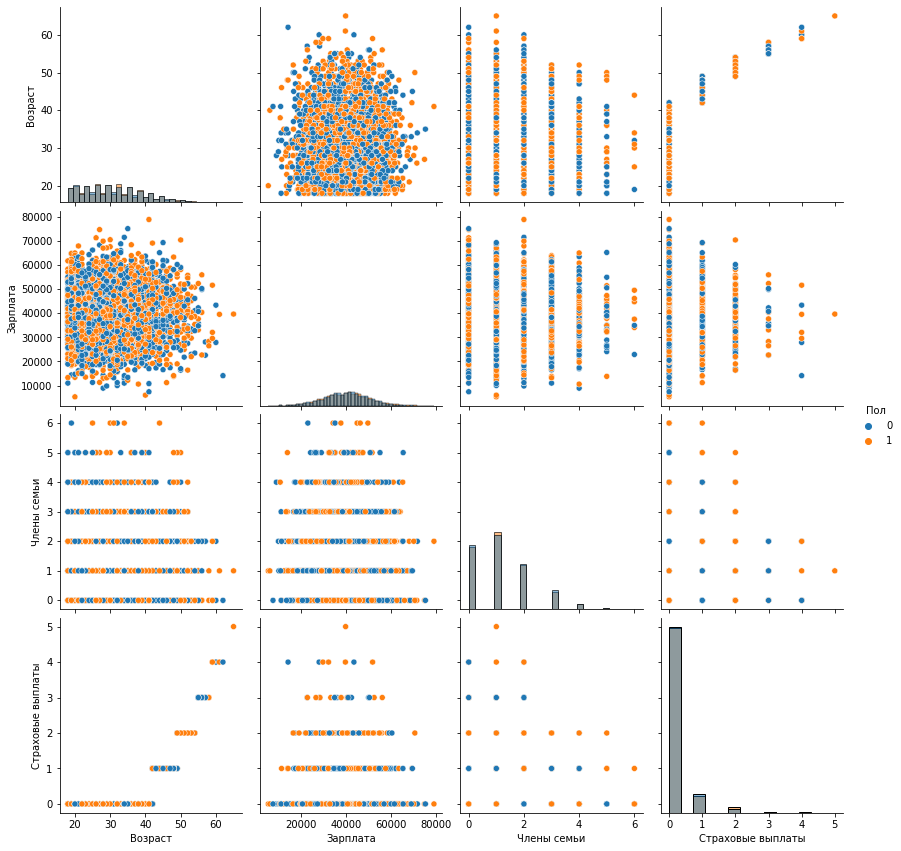

In [7]:
sns.pairplot(df, hue="Пол", diag_kind="hist",height=3);


- почти все страховые выплаты - 0 
- страховые выпалты начинают повышаться с достижением ~40 лет и дальше примерно каждые 5-10лет  
- зарплата распределена ~ нормально 

----
Посмотрим на некторые графики поближе

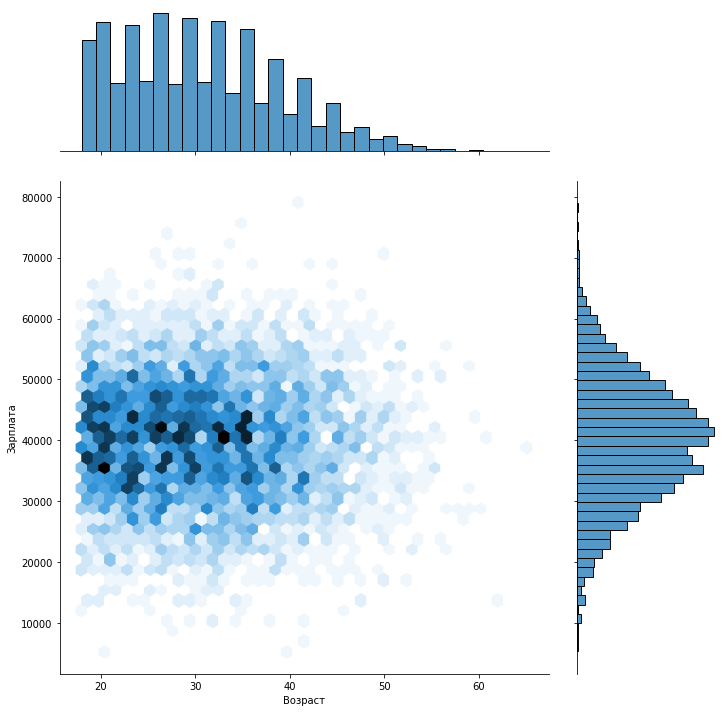

In [8]:
sns.jointplot(data=df, x="Возраст", y="Зарплата", kind="hex",height=10, ratio=3)
plt.show()

- видим, что выборка по возрастам уменьшается  
- пиковые значения находятся на пересечении больших плотностей, т.е. 30..50 тысяч и возраста до 40 лет  

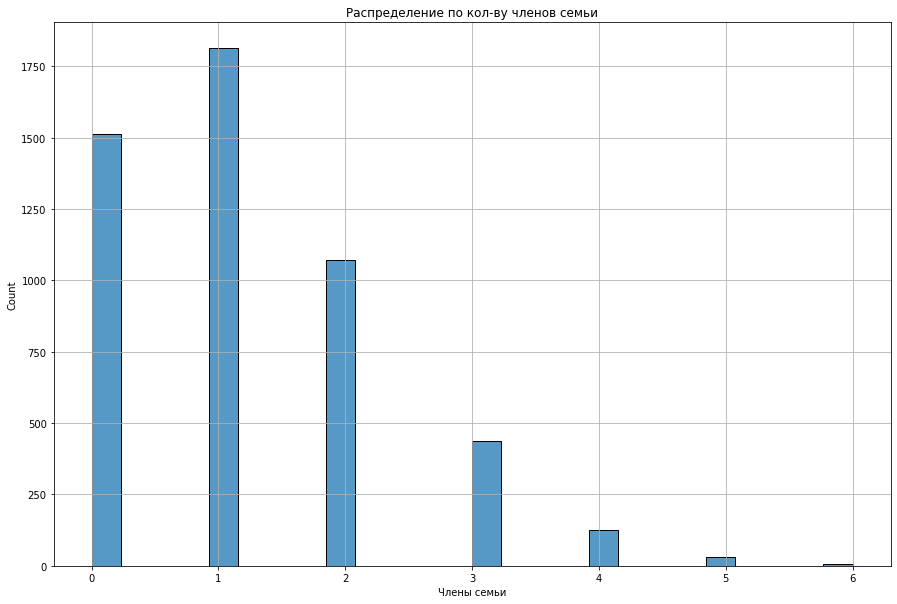

In [9]:
plt.figure(figsize=(15,10))
plt.grid()
sns.histplot(df, x ='Члены семьи')
plt.title('Распределение по кол-ву членов семьи')
plt.show()

- видно, что большинство людей из выборки имеют от 0 до 2 

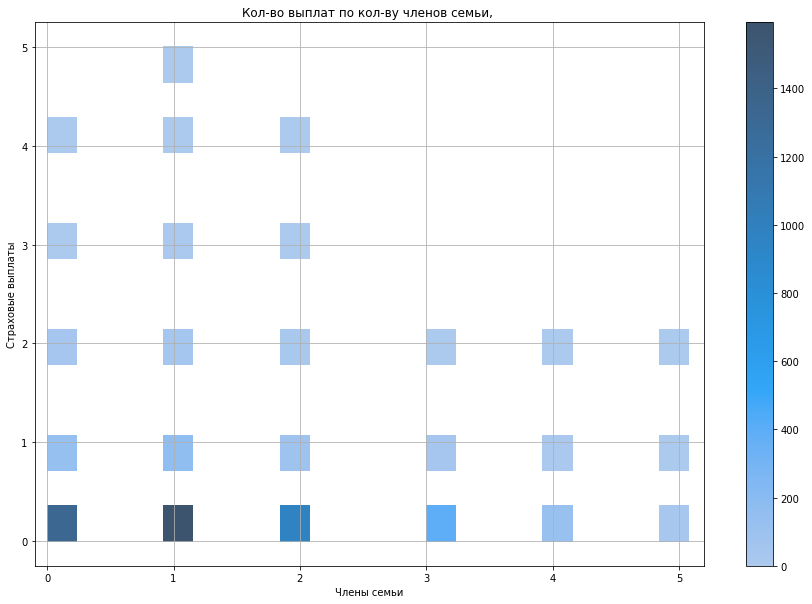

In [10]:
plt.figure(figsize=(15,10))
plt.grid()
plt.title('Кол-во выплат по кол-ву членов семьи, ')
plt.xlim(-0.1,5.2)
sns.histplot(df, x ='Члены семьи', y = 'Страховые выплаты',cbar=True)
plt.show()

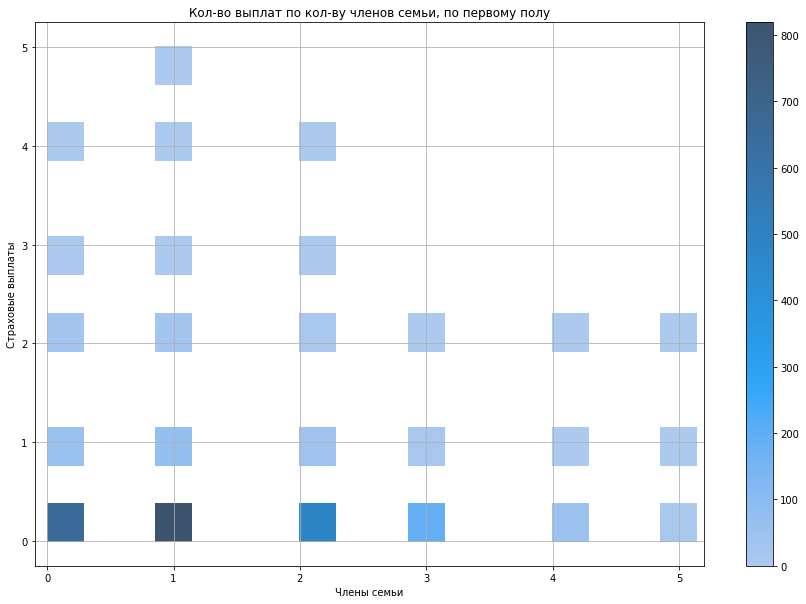

In [11]:
plt.figure(figsize=(15,10))
plt.grid()
plt.title('Кол-во выплат по кол-ву членов семьи, по первому полу')
plt.xlim(-0.1,5.2)
sns.histplot(df[df['Пол'] == 1], x ='Члены семьи', y = 'Страховые выплаты',cbar=True)
plt.show()

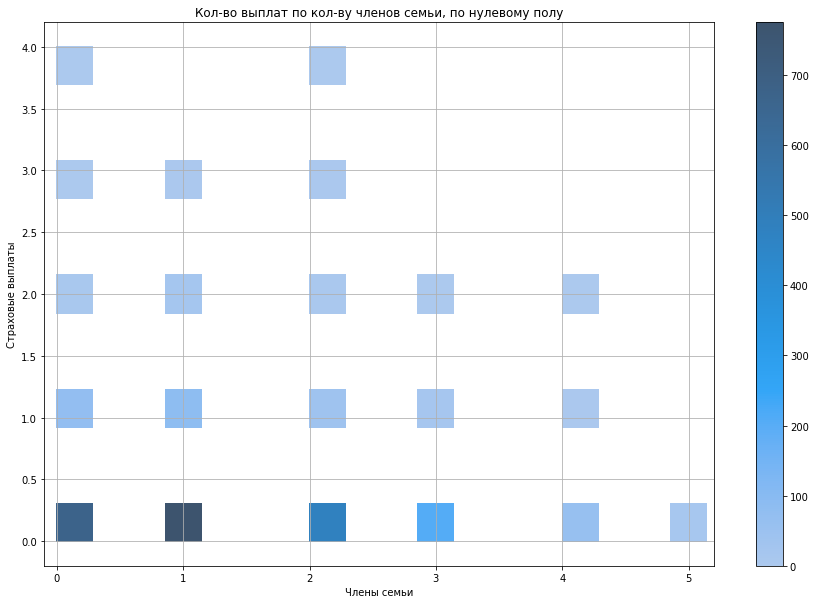

In [12]:
plt.figure(figsize=(15,10))
plt.grid()
plt.title('Кол-во выплат по кол-ву членов семьи, по нулевому полу')
plt.xlim(-0.1,5.2)
sns.histplot(df[df['Пол']==0], x ='Члены семьи', y = 'Страховые выплаты',cbar=True)
plt.show()

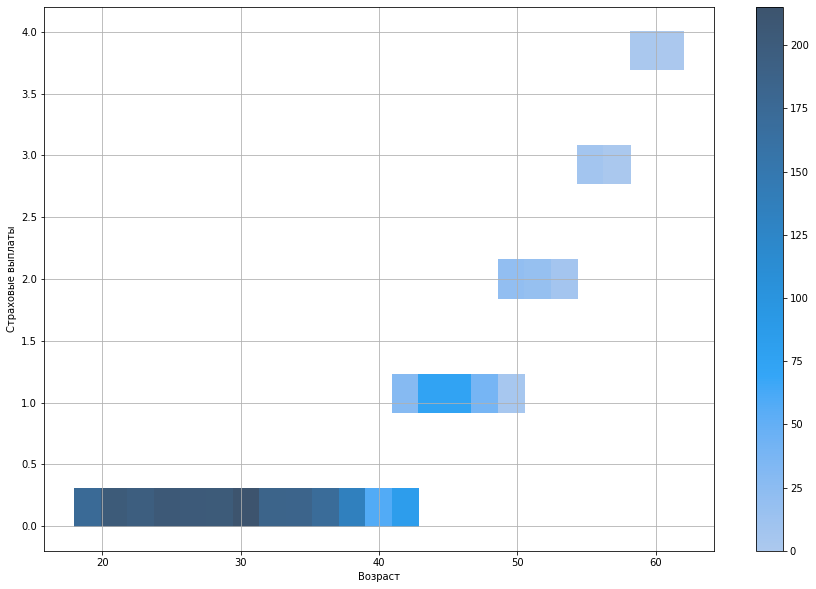

In [13]:
plt.figure(figsize=(15,10))
plt.grid()
plt.title('')
sns.histplot(df[df['Пол']==0], x ='Возраст', y = 'Страховые выплаты',cbar=True)
plt.show()

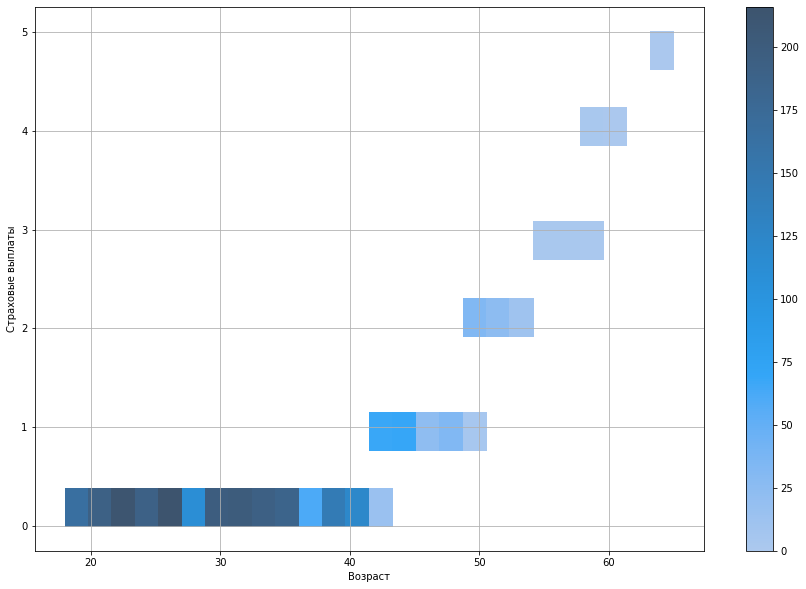

In [14]:
plt.figure(figsize=(15,10))
plt.grid()
plt.title('')
sns.histplot(df[df['Пол']==1], x ='Возраст', y = 'Страховые выплаты',cbar=True)
plt.show()

- тут видно более подробно когда происходят переходы

 **Вывод:**  
1. Был изменен тип переменных в столбце возраста

2. Таргет - дискретная количественная переменная, которая может принимать значения от 0 до 5.


3. Существует положительная средняя корреляция между возрастом и страховыми выплатами, что может указывать на то, что страховые выплаты увеличиваются с возрастом.

4. Остальные признаки не имеют существенной корреляции с таргетом.

5. Большинство страховых выплат равны 0.

6. Страховые выплаты начинают повышаться примерно с 40 лет следующий подъем около 50, далее около 55, далее ~ каждые три года

8. Распределение зарплаты приближено к нормальному.

9. Выборка клиентов снижается с возрастом.

10. Большинство клиентов имеют от 0 до 2 членов семьи.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** не изменится

**Обоснование:**   
Пусть :  
$A$ - обратимая матрица (m,m),   
$X$ - матрица (n,m)  

$ \begin{cases}
{\vec y=X*	\vec\omega + \vec\epsilon}\\
{\vec y=X*A *	\vec\omega_0 + \vec\epsilon}
\end{cases} \Rightarrow  
X *	\vec\omega + \vec\epsilon = X*A *	\vec\omega_0 + \vec\epsilon \Leftrightarrow 
X *	\vec\omega  = X*A *	\vec\omega_0 \Leftrightarrow 
X *	\vec\omega  - X*A *	\vec\omega_0 = 0 \Leftrightarrow \\ 
\Leftrightarrow X*(\vec\omega - A*\vec\omega_0) = 0 \Leftrightarrow$
  

$\Leftrightarrow\left[
  \begin{array}
      xX = 0  \\
     (\vec\omega - A*\vec\omega_0) = 0 \\
  \end{array}
\right.$  

$\vec\omega = A*\vec\omega_0 \Rightarrow \vec\omega_0 = A^{-1}\vec\omega$  
Из этого следует, что качество линейной регрессии не изменится при умножении признаков на обратимую матрицу $A$, так как мы можем просто пересчитать вектор весов, используя формулу $\vec{\omega} = A*\vec{\omega_0}$, и получить такой же результат, какой был бы при использовании исходной матрицы признаков $X$.

## Алгоритм преобразования

**Алгоритм**
1) Создание обратной матрицы   
----1.1) Создаем матрицу размерностью (кол-во столбцов минус 1)    
----1.2) Проверяем на вырожденность   
----1.3) Если вырожденная - генерируем заново пока не будет вырожденной   
----1.4) Сохраняем обратную матрицу в файл с именем key_centr.txt  
2) Центрирование    
----2.1) Вычисляем среднее значение каждого столбца из каждого столбца (за исключением таргета)  
----2.2) Сохраняем вектор-столбец со средними значениями в файл с именем key_centr.txt  
----2.3) Вычитаем из матрицы признаков  
      
3) Умножаем на обратную матрицу справа  [(кол-во строк, кол-во столбцов - 1) @ (кол-во столбцов - 1, кол-во столбцов - 1)]
    

**Обоснование**
1) При центрировании, вычитаем из признака его среднее значение $X_{(n,m)}\longrightarrow X_{(n,m)}^{'}\\ \omega = (X^T*X)^{-1}*X^т*y$  
2) При центрировании: $\forall \vec x_j \hookrightarrow mean(\vec x_j) = 0$  
    2.1) Докажем это:  
        $\blacksquare \space 1.\space X_{:,\space j}=( x_{1j}, x_{2j},..., x_{nj})\\
         mean(\vec x_j) = \frac{1}{n}\sum_{i=1}^{n}x_{(i,j)}\\
      \\
        2. j-ый\space столбец\space примет\space вид: \\ 
        \space X_{:,\space j}^{'}= X_{:,\space j} - mean(\vec x_j)\\ 
        \space X_{:,\space j}^{'}=(x_{1j} - mean(\vec x_j), ..., x_{nj} - mean(\vec x_j))\\ 
        3. Среднее\space значение\space столбца\space j\space для\space X^{'} \\ 
        mean(X^{'}_{(:, j)}) = \frac{1}{n} * \sum_{i=1}^{n}X^{'}_{(i,j)} \\ 
         mean(X^{'}_{(:, j)}) = \frac{1}{n} * \sum X_{:,\space j} - mean(\vec x_j) \\ 
         mean(X^{'}_{(:, j)}) = \frac{1}{n} \sum(x_{1j} - mean(\vec x_j), ..., x_{nj} - mean(\vec x_j)) \\ 
          mean(X^{'}_{(:, j)}) = \frac{1}{n}((x_{1j} - mean(\vec x_j)) + ...+ (x_{nj} - mean(\vec x_j))) \\ 
          mean(X^{'}_{(:, j)}) =  \frac{1}{n}\sum(x_{ij}) - mean(\vec x_j) \\ 
          так\space как\space \frac{1}{n}\sum(x_{ij}) = mean(\vec x_j)\space получаем: \\ 
          mean(X^{'}_{(:, j)}) = 0\space\blacksquare$ 
            
              
 Пусть $\Gamma$ - вектор из единиц размером (n,1).  2 $(X^{'})^{T} * \Gamma = 0 $ (тут из-за суммы)  
 
3) $(X^{'})^{T} X^{'} = \big(X - \frac{\Gamma_n(\Gamma_n^T*X)}{n}\big)^T * \big(X - \frac{\Gamma_n(\Gamma_n^T*X)}{n}\big) = \\
= X^TX - \frac{1}{n}(X^T*\Gamma_n)*(\Gamma^T_n*X) - \frac{1}{n}(X^TX)*\Gamma_n*\Gamma_n^T + \frac{1}{n^2}(\Gamma^T_n * X)*(X^T*\Gamma_n)*\Gamma_n*\Gamma_n^T$

Первое слагаемое является обычным произведением матриц X^T и X, второе и третье слагаемые связаны с центрированием матрицы X.

Затем, для вычисления вектора весов w', достаточно решить систему линейных уравнений:

$(X')^T X' w' = (X')^T y$

или, подставляя выражение для $(X')^T X'$:

$(X^T X -\frac{1}{n} (X^T \Gamma_n) (\Gamma_n^T X) - \frac{1}{n} (X^T X) \Gamma_n \Gamma_n^T + \frac{1}{n^2} (\Gamma_n^T X) (X^T \Gamma_n) \Gamma_n \Gamma_n^T) w' = X^T y - \frac{1}{n} (X^T \Gamma_n) y$  
и имеем ввиду формулу $w' = inv((X')^T X') (X')^T y$

4)  Покажем что вектор весов $w$ в задаче без центрирования признаков может быть выражен через вектор весов $w'$ в задаче с центрированием признаков. 

Для этого рассмотрим линейную модель для задачи без центрирования признаков:

$$y = Xw + \epsilon$$

где $y$ - вектор целевой переменной,  
$X$ - матрица признаков,   
$w$ - вектор весов,   
$\epsilon$ - случайная ошибка.  
  
Выражение для центрированной матрицы $X'$:

$$y = (X' + \Gamma_n \bar{x}) w + \epsilon = X'w + \Gamma_n \bar{x} w + \epsilon$$
$\bar{x}$ - вектор средних значений признаков.

Выразим $w$ через $w'$:

$w = (X^T X)^{-1} X^T y = (X^T X)^{-1} X^T (X'w' + \Gamma_n \bar{x} w + \epsilon)$

$w = (X^T X)^{-1} X^T X'w' + (X^T X)^{-1} X^T \Gamma_n \bar{x} w + (X^T X)^{-1} X^T \epsilon$

Здесь первое слагаемое $w'$ может быть выражено через $w$ и другие фиксированные величины с помощью формулы для $w'$ из предыдущих выкладок. Второе слагаемое равно $0$, так как $\bar{x}$ центрировано и равно нулю. Третье слагаемое является случайной ошибкой, которая не зависит от признаков и не изменится при центрировании признаков.  
$w$ в задаче без центрирования признаков может быть выражен через $w'$ и  фиксированные величины. Это означает, что линейная зависимость между признаками и целевой переменной не меняется при центрировании признаков.

Умножение на обратимую матрицу доказали в прошлом пункте.

## Проверка алгоритма

In [15]:
#функция принимающая измененный дф и преобразовывающая этот дф в первоначальный вид
def decrypt(df):
    try:
        key_marix = np.loadtxt('key_inv.txt')
        key_vector = np.loadtxt('key_centr.txt')
        encrypted_df = df@np.linalg.inv(key_marix) + key_vector
        encrypted_df = encrypted_df.rename({i: col for i, col in enumerate(df.columns)}, axis=1)
        encrypted_df[['Пол', 'Члены семьи', 'Возраст']] = np.round(abs(encrypted_df[['Пол', 'Члены семьи', 'Возраст']]))
        return encrypted_df
    except: 
        print("Нет ключа")
      
    

In [16]:
np.random.seed(42)
A = np.random.randn(len(df.columns)-1, len(df.columns)-1) # сгенерили матрицу по кол-ву признаков
while np.linalg.det(A) == 0:
    A = np.random.randn(len(df.columns)-1, len(df.columns)-1) # проверяем на вырожденность


print(A)
A = np.linalg.inv(A)
np.savetxt('key_inv.txt', A) # сохранили в файл обратную матрицу
print(A)

[[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753]]
[[-0.33124857 -1.0333483  -2.21070923 -0.47651024]
 [ 0.12864778 -0.47781825  0.15271687 -0.43017975]
 [-0.51338817  0.33588835 -0.8347692  -0.24072429]
 [ 0.99462192  0.15079316  1.08985145  0.21872535]]


In [17]:
B = np.mean(df.drop('Страховые выплаты', axis=1), axis=0)
np.savetxt('key_centr.txt', B) # тут сохранили вектор средних значений для каждого столбца

In [18]:
df_dec = pd.DataFrame(( 
    (df.drop('Страховые выплаты', axis=1) - np.mean(df.drop('Страховые выплаты', axis=1), axis=0) ).values @ A), 
    columns = df.drop('Страховые выплаты', axis=1).columns)

In [19]:
df_dec['Страховые выплаты'] = df['Страховые выплаты'] # разделил для проверки

In [20]:
df_dec.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,-4970.532760,3247.274160,-8083.389241,-2335.690698,0
1,985.744476,-650.386473,1602.907758,455.036707,1
2,9710.161698,-6352.516350,15790.298098,4554.444010,0
3,-916.013318,604.496681,-1488.466348,-424.669957,0
4,7091.422145,-4640.041282,11530.611758,3326.703788,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_dec.drop('Страховые выплаты', axis=1), 
                                                    df_dec['Страховые выплаты'],
                                                    test_size=0.25, 
                                                    random_state=42)
model = LinearRegression()

In [22]:
model.fit(X_train,y_train)

LinearRegression()

In [23]:
pr = np.round(model.predict(X_test))

In [24]:
print(f'Качество для преобразованных данных : {r2_score(y_test, pr)}')

Качество для преобразованных данных : 0.6087792586698495


In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Страховые выплаты', axis=1), 
                                                    df['Страховые выплаты'],
                                                    test_size=0.25, 
                                                    random_state=42)
model = LinearRegression()

In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
pr1 = np.round(model.predict(X_test))

In [28]:
print(f'Качество для изначальных данных : {r2_score(y_test, pr1)}')

Качество для изначальных данных : 0.6087792586698495


In [29]:
decrypted_df = decrypt(df_dec.drop('Страховые выплаты', axis=1))

In [30]:
diff = df.drop('Страховые выплаты', axis=1).compare(decrypted_df)

In [31]:
diff

Зарплата         
         self    other
2     21000.0  21000.0
420   13800.0  13800.0
437    8900.0   8900.0
440   14600.0  14600.0
630   19400.0  19400.0
...       ...      ...
4410  16000.0  16000.0
4623   7400.0   7400.0
4735  18700.0  18700.0
4834  22000.0  22000.0
4866  20400.0  20400.0

[75 rows x 2 columns]

In [32]:
max(diff[('Зарплата',  'self')] - diff[( 'Зарплата',  'other')])

7.275957614183426e-12

**Вывод:** 
В результате работы были загружены и изучены данные, был дан ответ, что качество не изменится, указаны связи параметров линейной регрессии в исходной и преобразованной задаче. Также был предложен и реализован алгоритм преобразования данных, основанный на центрировании и умножении на обратимую матрицу, который был успешно проверен на качество линейной регрессии. Кроме того, была реализована функция для дешифровки данных с погрешностью не более 10^(-12). 

Качество для изначальных данных : 0.6087792586698495  
Качество для преобразованных данных : 0.6087792586698495

Проведенные действия позволяют сделать вывод о том, что использование преобразования данных, основанного на центрировании и умножении на обратимую матрицу, может быть эффективным методом для решении задачи скрытия данных, не меняющей качества работы модели линейной регрессии.